<a href="https://colab.research.google.com/github/ReidelVichot/DEFreightProfiles/blob/main/Roads_Tracks_infograph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 20.3 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import CCD from google drive Source: Census
ccd_name = "/content/drive/My Drive/FreightProfiles/tl_rd22_10_cousub (1)/tl_rd22_10_cousub.shp"
ccd =  gpd.read_file(ccd_name)
# Import tracks from google drive
# Source: Fist Maps
# https://de-firstmap-delaware.hub.arcgis.com/datasets/railroad-rail-lines/explore?location=39.655622%2C-75.765561%2C13.56
rail_name = "/content/drive/MyDrive/FreightProfiles/Delaware_Multimodal_2.0_tracks/Delaware_Multimodal_2.0.shp"
rail = gpd.read_file(rail_name)

In [5]:
ccd = ccd.to_crs("EPSG:2235")
rail = rail.to_crs("EPSG:2235");

In [6]:
ccd.columns

Index(['STATEFP', 'COUNTYFP', 'COUSUBFP', 'COUSUBNS', 'GEOID', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CNECTAFP', 'NECTAFP',
       'NCTADVFP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')

In [7]:
cols = ['NAME','geometry']
ccd = ccd[cols]

In [8]:
cols = ['TRACK_TYPE', 'STATUS', 'LINE_ID', 'OWNER', 'geometry']
rail = rail[cols]

In [9]:
rail.STATUS.unique()

array(['Active', 'Inactive'], dtype=object)

In [10]:
rail[rail.STATUS=="Active"].head()

TRACK_TYPE  STATUS             LINE_ID                         OWNER  \
0   Industry  Active  Delmarva Secondary  Norfolk Southern Corporation   
1   Industry  Active  Delmarva Secondary  Norfolk Southern Corporation   
2   Industry  Active  Delmarva Secondary  Norfolk Southern Corporation   
3       Main  Active  Delmarva Secondary  Norfolk Southern Corporation   
4       Main  Active  Delmarva Secondary  Norfolk Southern Corporation   

                                            geometry  
0  LINESTRING (621911.241 415834.465, 621879.679 ...  
1  LINESTRING (621516.832 415610.758, 621483.946 ...  
2  LINESTRING (619813.748 417190.705, 619771.837 ...  
3  LINESTRING (595823.092 468347.189, 595724.533 ...  
4  LINESTRING (608681.086 443228.853, 608580.796 ...

In [11]:
#ccd = ccd.to_crs(rail.crs)

# Get the intersection of the line and the polygon
intersection = gpd.overlay(rail, ccd[ccd["NAME"]=="Newark"], how="intersection")


# Get the length of the intersection
intersection.length.sum()

# Print the result
#print(f"The length of the line within the polygon is {length:.2f} units.")

222102.76168900417

                                                    length_ft  length_miles
OWNER                                   STATUS                             
CSX Transportation                      Active   27370.423085      5.183794
National Railroad Passenger Corporation Active  173582.345333     32.875455
Norfolk Southern Corporation            Active   13594.687556      2.574752


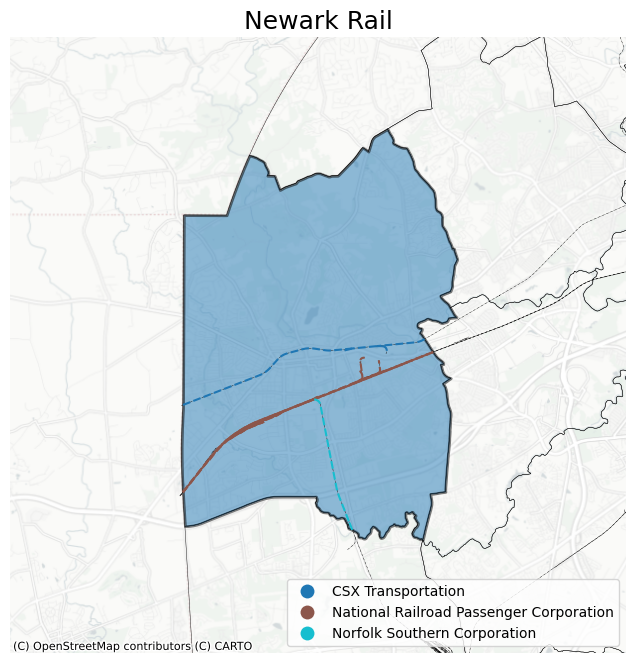

In [12]:
import contextily as cx

CCD = "Newark"
resol = 30000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

fig, ax = plt.subplots(figsize=(8,8))

plt.title(CCD + " Rail", fontdict={"fontsize":18})

ccd.plot(facecolor = "none", lw = 0.3, ax=ax)
ccd[ccd["NAME"]==CCD].plot(alpha=0.5, edgecolor="k", lw = 2 , ax=ax)
rail.plot(color="k", linestyle="-.", lw = 0.3, ax=ax)

intersect = gpd.overlay(rail[rail.STATUS=="Active"], ccd[ccd["NAME"]==CCD], how="intersection")
intersect.plot("OWNER", linestyle="--", ax=ax,
                        legend=True,
                        legend_kwds={'loc':"lower right"})

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
fig.show()

intersect["length_ft"] = intersect.length
intersect["length_miles"] = intersect.length_ft * 0.000189394

print(intersect.groupby(["OWNER", "STATUS"]).sum(numeric_only = True)[["length_ft", "length_miles"]])

In [13]:
gpd.overlay(rail, ccd[ccd["NAME"]==CCD], how="intersection").crs

<Projected CRS: EPSG:2235>
Name: NAD83 / Delaware (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Delaware - counties of Kent; New Castle; Sussex.
- bounds: (-75.8, 38.44, -74.97, 39.85)
Coordinate Operation:
- name: SPCS83 Delaware zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
#road_invent = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Road_Inventory_2.0 (2)/Delaware_Road_Inventory_2.0.shp")

In [15]:
CFC = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0 (1)/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0.shp")
CFC = CFC.to_crs("EPSG:2235")

In [16]:
#Freight Movement Bottlenecks
FMB = gpd.read_file("/content/drive/MyDrive/FreightProfiles/FreightMovementBottlenecks/Delaware_Multimodal_2.0.shp")
FMB = FMB.to_crs("EPSG:2235")

In [17]:
FMB.columns

Index(['OBJECTID', 'TMC_CODE', 'CORRIDOR_I', 'DESCRIPTIO', 'NAME', 'MILES',
       'TMC', 'TMCTYPE', 'ROADNUMBER', 'ROADNAME', 'ISPRIMARY', 'COUNTY',
       'ZIP', 'DIRECTION', 'URBAN_CODE', 'FACILTYPE', 'STRUCTYPE',
       'HOURLY_CAP', 'TOTAL_THRU', 'TOTAL_CAPA', 'ROUTE_NUMB', 'ROUTE_SIGN',
       'ROUTE_QUAL', 'ALTRTENAME', 'TOTAL_AADT', 'UNIT_TRUCK', 'COMBINATIO',
       'TRUCK', 'AM_PEAK_RE', 'PM_PEAK_RE', 'SUM_PEAK_R', 'AM_RELIABI',
       'PM_RELIABI', 'SUMMER_REL', 'HOURLY_C00', 'TRUCK_AADT', 'TRUCK_PERC',
       'UNIT_PERCE', 'COMBINAT00', 'BOTTLENECK', 'PRIORITY', 'RANK',
       'geometry'],
      dtype='object')

In [18]:
FMB.TRUCK_PERC

0          7% to 9%
1          7% to 9%
2          7% to 9%
3         9% to 11%
4         9% to 11%
5          7% to 9%
6          7% to 9%
7          7% to 9%
8          7% to 9%
9         9% to 11%
10        9% to 11%
11         7% to 9%
12    11% and Above
13         7% to 9%
14         7% to 9%
Name: TRUCK_PERC, dtype: object

In [19]:
CFC.length * 0.000189394

0      4.124179
1      2.823466
2      0.815235
3      1.630089
4      1.704565
5      5.901573
6      2.450157
7      6.425413
8      5.516843
9      4.660229
10     2.227895
11     0.662741
12     0.741035
13     0.928668
14     0.404078
15     1.434925
16    26.074560
17     1.378032
18    17.751372
19     3.736288
20     2.377973
21     1.332453
22     0.374783
23     1.271331
24     4.074257
25    19.689312
26     0.804012
27     1.002108
28     0.298515
29     5.938863
30     5.089636
31     1.816864
32    11.172195
33    10.456265
34     4.763832
35    24.655174
36    37.264276
37     0.479434
38     5.660920
39    11.501132
40    23.442521
dtype: float64

In [20]:
CFC['FREIGHT_NE'].unique()

array(['CUFC', 'CRFC', 'PFN'], dtype=object)

In [21]:
CoastalCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/CoastalCorridor/Delaware_Multimodal_2.0.shp")
CoastalCorridor = CoastalCorridor.to_crs("EPSG:2235")

MetroCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/MetroCorridor/Delaware_Multimodal_2.0.shp")
MetroCorridor = MetroCorridor.to_crs("EPSG:2235")

LewesCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/LewesCorridor/Delaware_Multimodal_2.0.shp")
LewesCorridor = LewesCorridor.to_crs("EPSG:2235")

BayCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/BayCorridor/Delaware_Multimodal_2.0.shp")
BayCorridor = BayCorridor.to_crs("EPSG:2235")

PiedmontCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/PiedmontCorridor/Delaware_Multimodal_2.0.shp")
PiedmontCorridor = PiedmontCorridor.to_crs("EPSG:2235")

In [22]:
PiedmontCorridor

OBJECTID RECTYPE      VERSION       RECID        ORIGID  STFIPS  CTFIPS  \
0         1       L  2012.10.01B  1032092971  103200090296    3296    3990   

  SOURCE  LGURB    SMURB  ... CONN_MILES LRSKEY LRSSEQ       BEGMP  \
0      S    132  2279508  ...          9   None    158  156.706999   

        ENDMP     AADT THRULANES OWNERSHIP FRGHTCRRDR  \
0  211.900999  1697920       182        34   Piedmont   

                                            geometry  
0  MULTILINESTRING ((406741.682 754779.123, 40659...  

[1 rows x 43 columns]

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'colu

Empty DataFrame
Columns: [LENGTH, length_ft, length_miles]
Index: []
Empty DataFrame
Columns: [UNIT_TRUCK]
Index: []


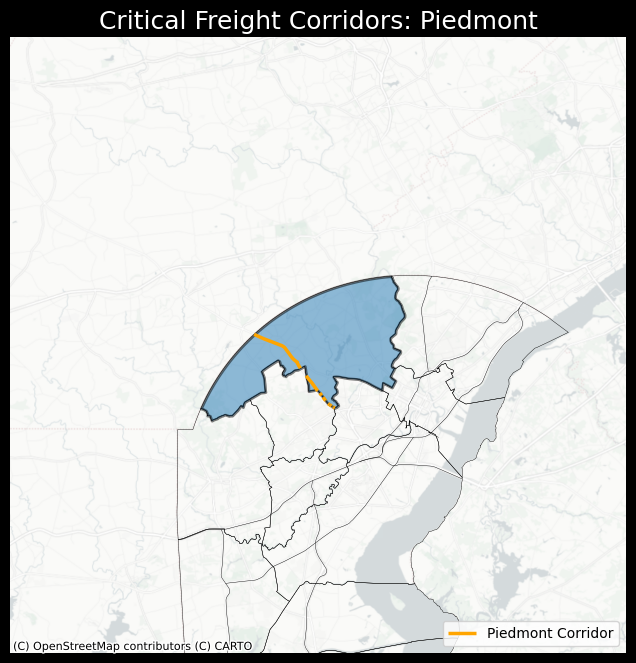

In [23]:
import contextily as cx

CCD = "Piedmont"
resol = 85000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

font = {'color':  'white',
        'weight': 'normal',
        'size': 18}

fig, ax = plt.subplots(figsize=(8,8), facecolor="k")

plt.title("Critical Freight Corridors: " + CCD, fontdict=font)

ccd.plot(facecolor = "none", lw = 0.3, ax=ax)
ccd[ccd["NAME"]==CCD].plot(alpha=0.5, edgecolor="k", lw = 2 , ax=ax)
CFC.plot(color="k", linestyle="-", lw = 0.3, ax=ax)

metro_intercept = gpd.overlay(MetroCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
metro_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Metro Corridor', color="orange",
                             zorder=1);

piedmont_intercept = gpd.overlay(PiedmontCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
piedmont_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Piedmont Corridor', color="orange",
                             zorder=1);

bay_intercept = gpd.overlay(BayCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
bay_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Bay Corridor', color="orange",
                             zorder=1);

lewes_intercept = gpd.overlay(LewesCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
lewes_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Lewes Corridor', color="orange",
                             zorder=1);


coastal_intercept = gpd.overlay(CoastalCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
coastal_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Coastal Corridor', color="wheat",
                             zorder=1);

intersect = gpd.overlay(CFC, ccd[ccd["NAME"]==CCD],
            how="intersection")

intersect[intersect["FREIGHT_NE"]=='CUFC'].plot(linestyle="-", ax=ax,
                             label = 'CUFC', color="steelblue");
intersect[intersect["FREIGHT_NE"]== 'CRFC'].plot(linestyle="-", ax=ax,
                             label = 'CRFC', color="darkgreen");
intersect[intersect["FREIGHT_NE"]== 'PFN'].plot(linestyle="-", ax=ax,
                             label = 'PFN', color="peru");


bottleneck_intersect = gpd.overlay(FMB, ccd[ccd["NAME"]==CCD],
            how="intersection")

bottleneck_intersect.plot("ROADNAME", linestyle="-", ax=ax,
                             label = "Bottleneck", color="red");

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
ax.legend(loc='lower right')
fig.show()

intersect["length_ft"] = intersect.length
intersect["length_miles"] = intersect.length_ft * 0.000189394
print(intersect.groupby("FREIGHT_NE").sum(numeric_only = True)[["LENGTH", "length_ft", "length_miles"]])
print(bottleneck_intersect.groupby("ROADNAME").sum(numeric_only = True)[["UNIT_TRUCK"]])

<Axes: >

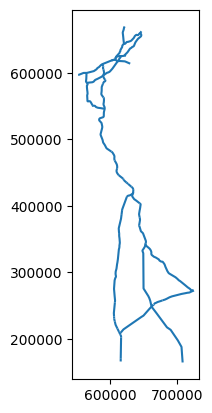

In [24]:
CFC.plot()

<Axes: >

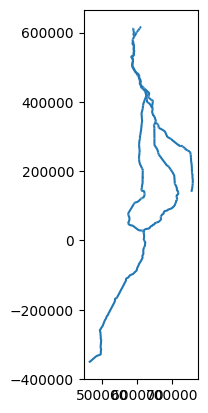

In [25]:
CoastalCorridor.plot()

In [ ]:
CCD = "Dover"
resol = 85000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

font = {'color':  'black',
        'weight': 'normal',
        'size': 16}

# [left, bottom, width, height]


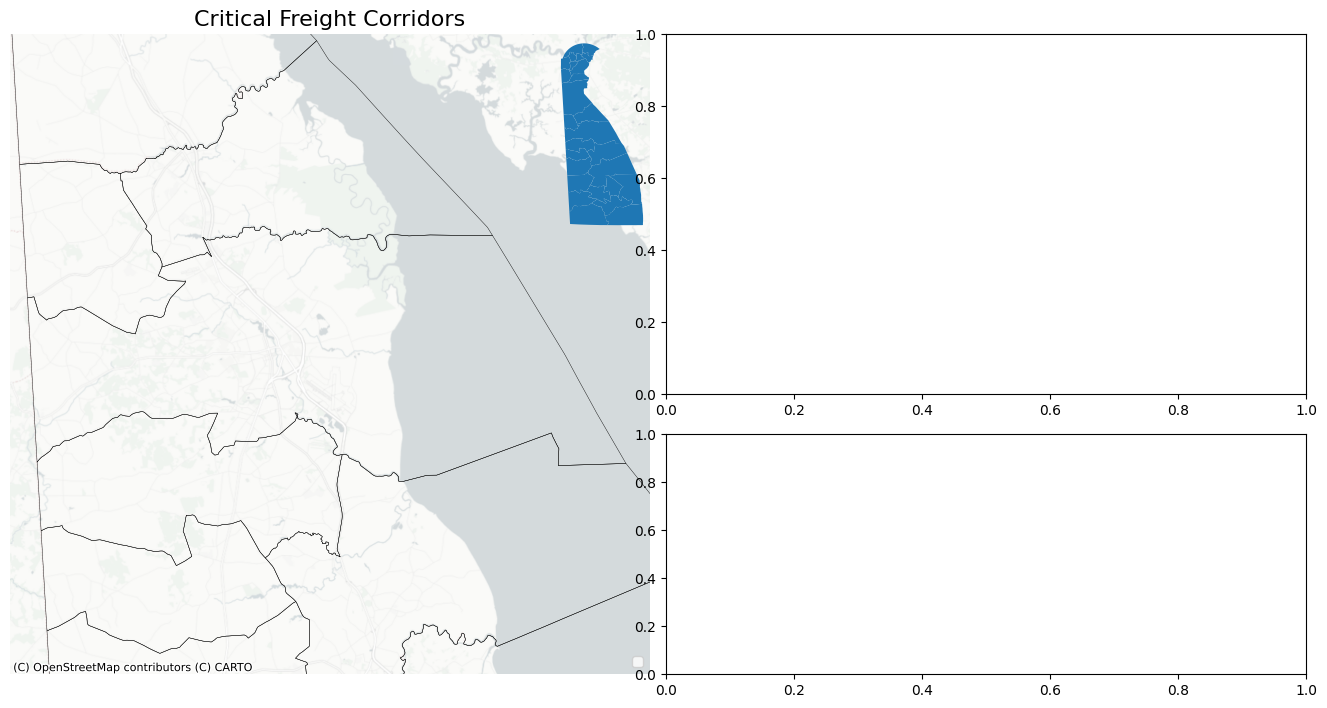

In [72]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_axes([0.05, 0.05, 0.4, 0.8])
plt.title("Critical Freight Corridors", fontdict=font)

ccd.plot(facecolor = "none", lw = 0.3, ax=ax)

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

ax2 = fig.add_axes([0.37, 0.60, 0.1, 0.25])
ccd.plot(ax=ax2)
ax2.set_axis_off()

ax3 = fig.add_axes([0.460, 0.05, 0.4, 0.3])

ax4 = fig.add_axes([0.460, 0.40, 0.4, 0.45])

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
ax.legend(loc='lower right')
fig.show()

